In [1]:
# Import Packages
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Let's define the sigmoid function

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g


In [3]:
# Let's print the output of the sigmoid function for an array of values

# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Define the output by inputting the numbers below to the sigmoid function
y = sigmoid(z_tmp)

# Printing the result
print(np.c_[z_tmp,y])


[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


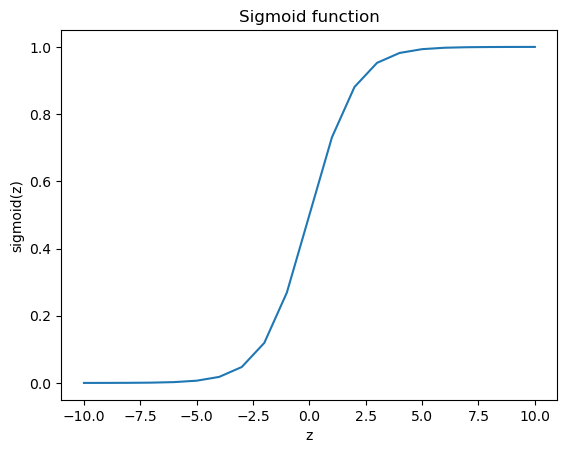

In [4]:
# Let's plot z vs sigmoid (z)
x = z_tmp
y = sigmoid(z_tmp)

plt.plot(x,y)
plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.show()

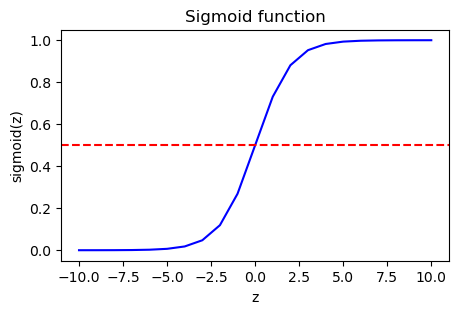

In [6]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np

# Define the threshold as a function
def draw_hthresh(ax, y_value, color='r', linestyle='--'):
    """
    Parameters:
    ax (matplotlib.axes.Axes): The axes object to draw on.
    y_value (float): The y-coordinate where the horizontal line should be drawn.
    color (str): The color of the line (default is red).
    linestyle (str): The style of the line (default is dashed).
    """
    ax.axhline(y=y_value, color=color, linestyle=linestyle)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10, 11)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))


# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

# Draw the vertical threshold line at g(z) = 0.5
draw_hthresh(ax, 0.5)

plt.show()


In [7]:
# Cost Function
# Load packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


In [8]:
# Create a dataset
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1]) 

In [9]:
# Define cost function

def compute_cost_logistic(X,y,w,b):

    """ Arguments : 
    X : input array with m examples and n features
    y : array containing target values
    w : array with model's parameters
    b : scalar, model parameter """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost/m
    return cost

    


In [10]:
# Print output of cost function with predefined hyperparameters
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


In [12]:
# Print output of cost function with DIFFERENT predefined hyperparameters
w_tmp = np.array([1,1])
b_tmp = -4
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.5036808636748461


In [13]:
# Gradient Descent
# Load packages
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

In [14]:
# Create a dataset
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [15]:
# Let's define the sigmoid function

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g


In [16]:
# Defining the GRADIENT function

def compute_gradient_logistic(X,y,w,b):
    """ 
    Arguments :
    X : input array with m examples and n features
    y : array containing target values
    w : array with model's parameters
    b : scalar, model parameter

    Returns
    dj_dw : array of length n, represents the gradient of the cost w.r.t the parameters w.
    dj_db : scalar, represents the gradient of the cost w.r.t the parameter b.

    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw =  dj_dw/m
    dj_db = dj_db/m
    return dj_db, dj_dw

In [19]:
# Print output of gradient with predefined hyperparameters
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [22]:
# Defining a function for gradient DESCENT

def gradient_descent(X,y,w_in,b_in, alpha, num_iters):
    """ 
    Arguments :
    X : input array with m examples and n features
    y : array containing target values
    w_in : array containing initial values of model parameters
    b : scalar, initial values of model parameters
    alpha : float, learning rate
    num_iters : scalar, number of iteration to run gradient descent

    Returns
    w  : array of length n, updated values of parameter w.
    dj_db : scalar, updated values of parameter b.

    """
    # Creating an array to store cost J and w's at each iteration 
    J_history = []
    w = copy.deepcopy(w_in) 
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)  

        # Update parameters
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db 

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times 
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, b, J_history    
    

In [23]:
# Print output of gradient descent function with predefined hyperparameters
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 1000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


Iteration    0: Cost 0.684610468560574   
Iteration  100: Cost 0.5290450209691863   
Iteration  200: Cost 0.4341520395446094   
Iteration  300: Cost 0.36410903699091124   
Iteration  400: Cost 0.3112546924450482   
Iteration  500: Cost 0.2704706250711691   
Iteration  600: Cost 0.23832522010961596   
Iteration  700: Cost 0.21249424771338535   
Iteration  800: Cost 0.19137639252601465   
Iteration  900: Cost 0.17384645269746388   

updated parameters: w:[2.30457062 2.07622315], b:-5.907698379622684


In [33]:
# Regularization Implementation
# Load packages
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt


In [34]:
# Define cost function with regularization
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """ 
    Arguments : 
    X : input array with m examples and n features
    y : array containing target values
    w : array with model's parameters
    b : scalar, model parameter
    lambda_ : scalar, parameter controlling amount of regularization
   
    Returns :
    total_cost : scalar representing cost
    
    """

    m,n = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      
        f_wb_i = sigmoid(z_i)                                          
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i) 
    cost = cost/m

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2) 
    reg_cost = (lambda_/(2*m)) * reg_cost
    total_cost = cost + reg_cost                                       
    return total_cost 
    

In [35]:
# Print output of cost function with predefined hyperparameters
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


In [36]:
# Define Gradient Descent with regularization
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Arguments:

    X : input array with m examples and n features
    y : array containing target values
    w_in : array containing initial values of model parameters
    b : scalar, initial values of model parameters
    lambda_ : scalar, controls amount of regularization
    
    Returns
    dj_dw : array of shape n, gradient of the cost w.r.t. the parameters w.
    dj_db : scalar, gradient of the cost w.r.t. the parameter b.           
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            
    dj_db = 0.0                                       

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                  
    dj_db = dj_db/m                                   

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw 


In [37]:
# Print output of gradient descent with predefined hyperparameters
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
